In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_pickle('pickle_files/nasdaq_dataframe.pkl')

In [5]:
df.corr()

,ADBE,ADP,ABNB,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,...,TSLA,TXN,TTD,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZS
ADBE,1.000000,0.121002,0.241715,-0.860202,-0.862581,-0.457267,0.867009,0.071747,0.502572,0.304865,...,0.692910,0.340235,-0.119330,0.856233,0.739051,0.821190,0.542828,0.603092,-0.583063,0.824740
ADP,0.121002,1.000000,0.009179,-0.003745,-0.002820,-0.010530,-0.036287,0.342980,0.487298,0.030510,...,0.458854,0.017063,0.510715,0.285985,0.462171,0.222918,0.259593,0.568012,0.258795,0.434939
ABNB,0.241715,0.009179,1.000000,-0.054388,-0.066648,-0.016131,0.335311,0.072273,0.420639,0.475426,...,0.148110,0.633718,0.272608,0.268348,0.264640,0.435750,0.307077,0.159230,-0.319144,0.069727
GOOGL,-0.860202,-0.003745,-0.054388,1.000000,0.999814,0.563907,-0.866367,-0.035715,-0.416406,-0.040407,...,-0.600727,-0.175701,0.277085,-0.834764,-0.682283,-0.804243,-0.406410,-0.520328,0.648332,-0.779233
GOOG,-0.862581,-0.002820,-0.066648,0.999814,1.000000,0.562130,-0.871622,-0.034303,-0.422555,-0.043695,...,-0.604089,-0.180707,0.271843,-0.840908,-0.688328,-0.812158,-0.411529,-0.525750,0.654018,-0.781299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBA,0.821190,0.222918,0.435750,-0.804243,-0.812158,-0.502954,0.842344,0.135885,0.724649,0.182361,...,0.676381,0.350831,0.006247,0.937593,0.866565,1.000000,0.614327,0.701220,-0.543678,0.796374
WBD,0.542828,0.259593,0.307077,-0.406410,-0.411529,-0.257900,0.458357,0.052818,0.401066,0.277946,...,0.361104,0.195604,0.018560,0.565613,0.481268,0.614327,1.000000,0.482067,-0.089805,0.460270
WDAY,0.603092,0.568012,0.159230,-0.520328,-0.525750,-0.082846,0.541585,-0.003552,0.608871,0.049565,...,0.833924,0.042635,0.408791,0.783612,0.834400,0.701220,0.482067,1.000000,-0.219778,0.864775
XEL,-0.583063,0.258795,-0.319144,0.648332,0.654018,0.144192,-0.776886,0.154908,-0.218991,-0.202076,...,-0.357363,-0.358457,0.166339,-0.518027,-0.384756,-0.543678,-0.089805,-0.219778,1.000000,-0.355812


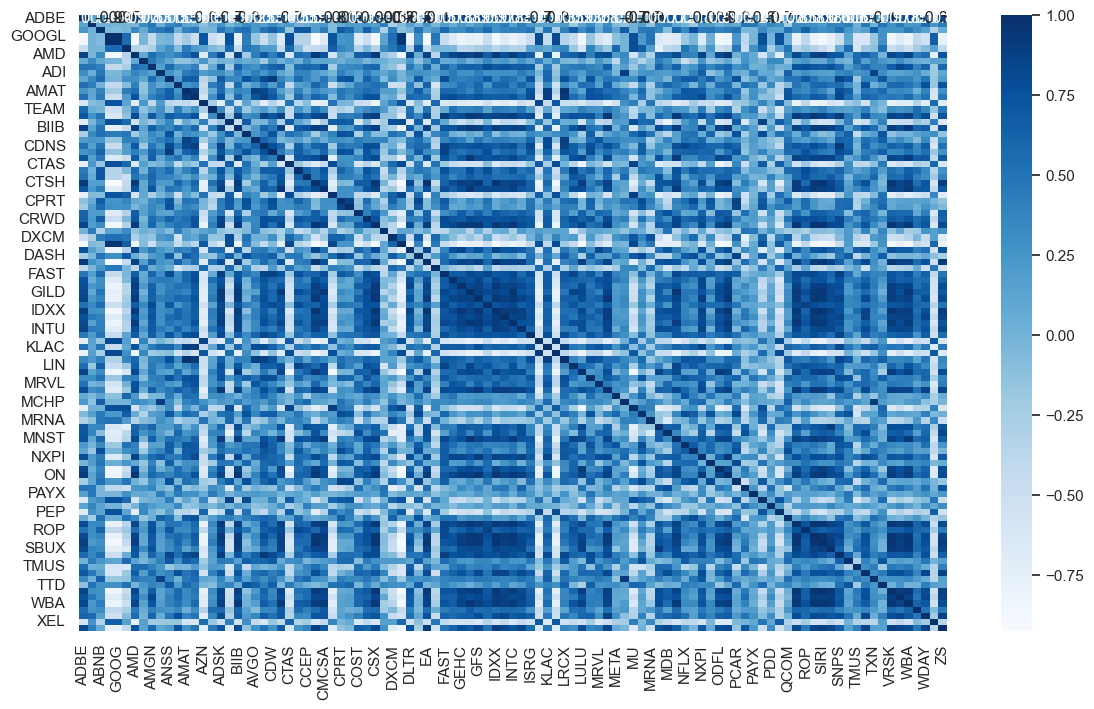

In [6]:
plt.figure(figsize=(14,8))
sb.set_theme(style="white")
corr = df.corr()
heatmap = sb.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

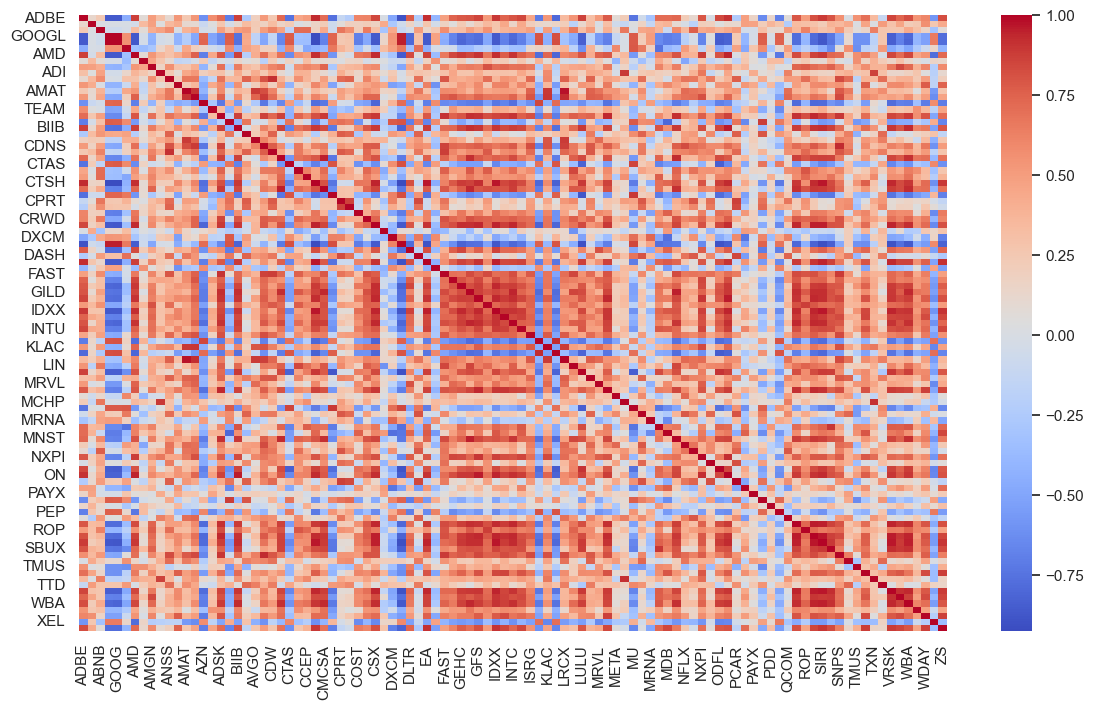

In [19]:
plt.figure(figsize=(14,8))
sb.set_theme(style="white")
corr = df.corr()
heatmap = sb.heatmap(corr, cmap="coolwarm")

c:\Users\giuli\Repositories\nasdaq_rnn\venv\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Figure size 1400x800 with 0 Axes>

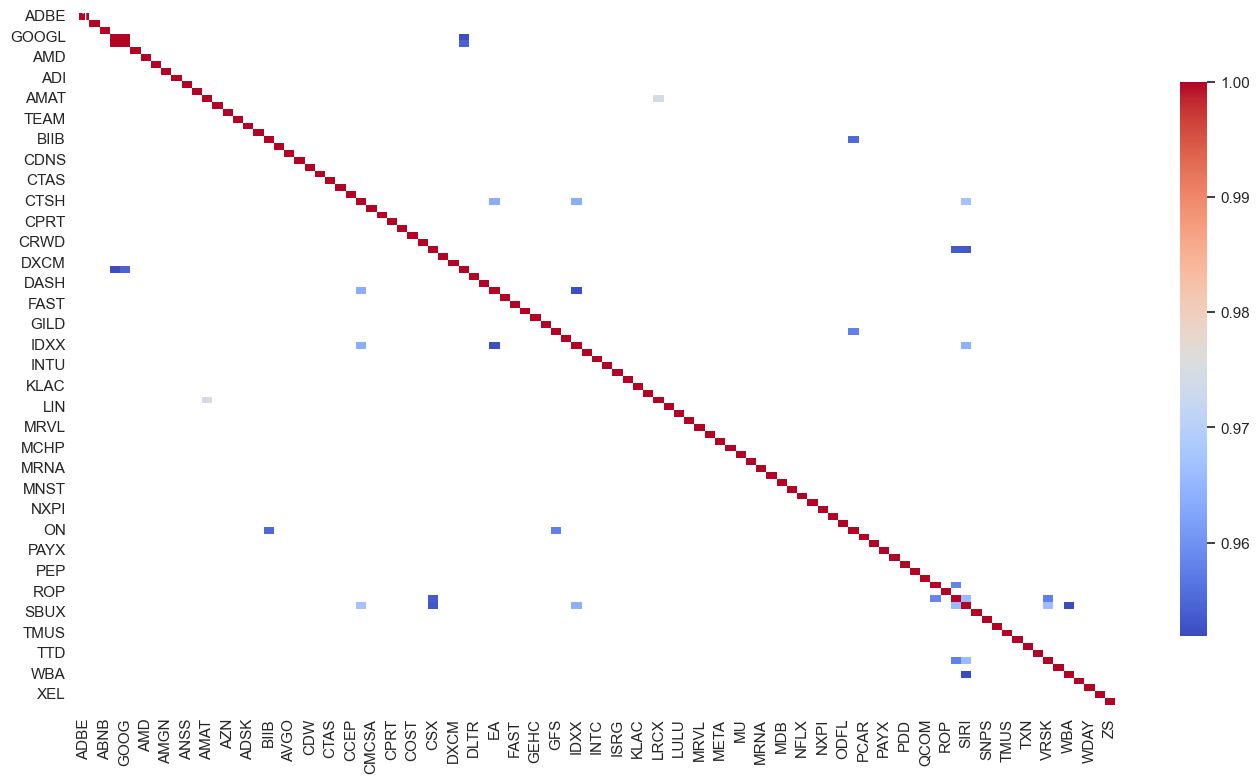

In [8]:

plt.figure(figsize=(14, 8))
sb.set_theme(style="white")

corr = df.corr()
mask = (corr.abs() < 0.95)

plt.figure(figsize=(14, 8))
heatmap = sb.heatmap(corr, mask=mask, cmap="coolwarm", annot=True, annot_kws={"size": 10}, cbar_kws={"shrink": .8})

plt.tight_layout()
plt.show()


In [14]:

high_corr_pairs = []
threshold = 0.95
for i in range(len(corr.columns)):
    for j in range(i + 1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

for pair in high_corr_pairs:
    print(f"Features: {pair[0]} and {pair[1]}, Correlation: {pair[2]}")

Features: GOOGL and GOOG, Correlation: 0.9998137709491335
Features: GOOGL and FANG, Correlation: 0.9522694793629817
Features: GOOG and FANG, Correlation: 0.9544073612724066
Features: AMAT and LRCX, Correlation: 0.9745078704935223
Features: BIIB and ON, Correlation: 0.95514726083755
Features: CTSH and EA, Correlation: 0.9635822342513722
Features: CTSH and IDXX, Correlation: 0.963575411119783
Features: CTSH and SIRI, Correlation: 0.9670352858283078
Features: CSX and ROST, Correlation: 0.9537522140290109
Features: CSX and SIRI, Correlation: 0.9531564852811081
Features: EA and IDXX, Correlation: 0.952298870913899
Features: GFS and ON, Correlation: 0.9577336217924575
Features: IDXX and SIRI, Correlation: 0.96404678291754
Features: REGN and ROST, Correlation: 0.9584541498766733
Features: ROST and SIRI, Correlation: 0.965665910708914
Features: ROST and VRSK, Correlation: 0.9579126591884453
Features: SIRI and VRSK, Correlation: 0.9659951228100092
Features: SIRI and WBA, Correlation: 0.95190592

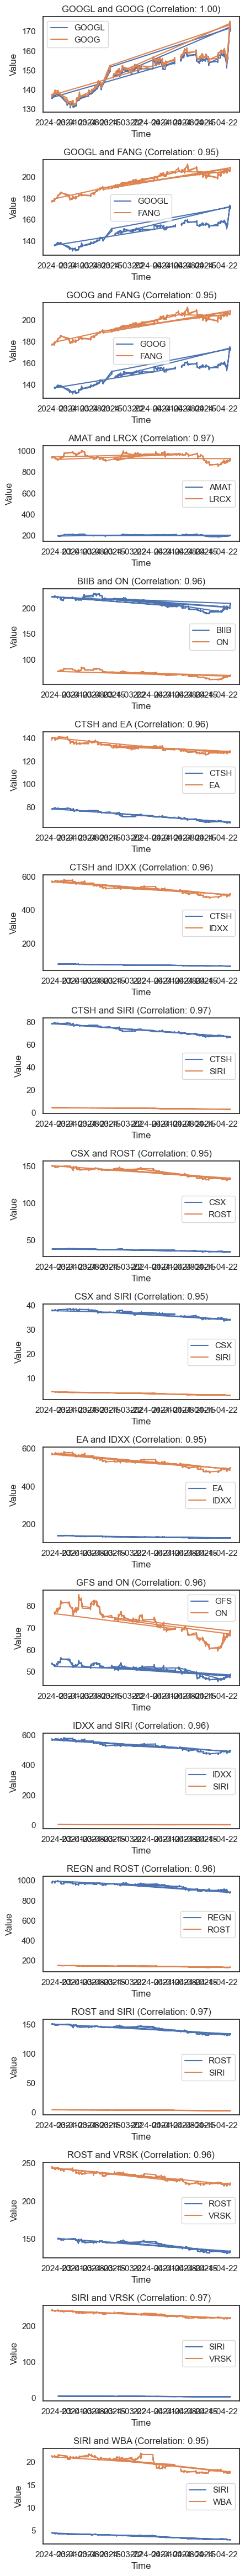

In [20]:
plt.figure(figsize=(4.6, 2.6 * len(high_corr_pairs)))

for idx, pair in enumerate(high_corr_pairs):
    plt.subplot(len(high_corr_pairs), 1, idx + 1)
    plt.plot(df.index, df[pair[0]], label=pair[0])
    plt.plot(df.index, df[pair[1]], label=pair[1])
    plt.title(f"{pair[0]} and {pair[1]} (Correlation: {pair[2]:.2f})")
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()